# Notes taken to summarize the Data Science and Machine Learning course using Python.  
That course gives a basic level coverage of most components used by general Data Scientists that are approachable without prior courses.  Following this, you could review:

* Machine Learning course by Andrew Ng (Stanford Universit): great review of many of these topics in better detail, focusing on Machine Learning
    * I am actively summarizing that course in the same way as this one in my *MachineLearning_NG_CourseNotes.ipynb*
* Data Science by Bill Howe (U-Washington)
* *data scientist tutorial*: reviews simple application of scikit-learn
* A big data course I have the vids for, but can't find proper title or instructor of... odd
* Taming Big Data with Apache Sparke and Python: Great for direct continuation of course summarized here, with how it is applied to big data through Apache Sparke.  (An identical course based on MapReduce also exists by the same instructor)

I highly recommed the 'Python for Data Structures, Algorithms, and Interviews!' course by Jose Portilla, on Udemy.  Great for preparing for CS based interviews and an intense review of practical parts of 1st and 2nd year CS in general.

# Getting started

Lectures 1-6 just cover basics of installing required packages and a super simple Python review.

# Statistics and Probability Refresher

Skipping adding stuff here for this as fairly basic.

### see my DistributionMetrics.ipynb for some basics, or lectures 7-18 of the course.

# Linear Regression

* fit a line to observations
* use line to predict values of other data

## Methods

* 'least squares': minimize squared-error
* Gradien Descent: better for higher-D data, but prone to issues due to starting position

r-squared: 0 = bad, 1 = perfect (all of variance is captured by model)

#### below code is my modified version in regression.ipynb of that originally in LinearRegression.ipynb and PolynomialRegression.ipynb

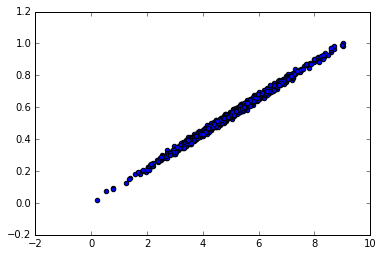

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

dossageEffectiveness = abs(np.random.normal(5.0, 1.5, 1000))
repurchaseRate = (dossageEffectiveness + np.random.normal(0, 0.1, 1000)) * 3
repurchaseRate/=np.max(repurchaseRate)
plt.scatter(dossageEffectiveness, repurchaseRate)
plt.show()

In [7]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(dossageEffectiveness, repurchaseRate)

r_value ** 2

0.99509525372340124

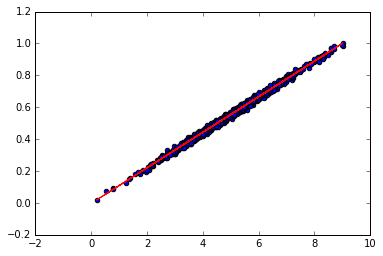

In [8]:
def predict(x):
    return slope * x + intercept

fitLine = predict(dossageEffectiveness)

plt.scatter(dossageEffectiveness, repurchaseRate)
plt.plot(dossageEffectiveness, fitLine, c='r')
plt.show()

## Modify this to a multivariate/polynomial regression example

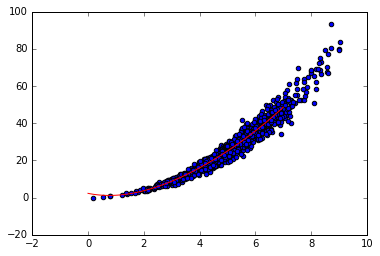

In [9]:
repurchaseRate = np.random.normal(1, 0.1, 1000)*dossageEffectiveness**2

poly = np.poly1d(np.polyfit(dossageEffectiveness, repurchaseRate, 4))

xPoly = np.linspace(0, 7, 100)
plt.scatter(dossageEffectiveness, repurchaseRate)
plt.plot(xPoly, poly(xPoly), c='r')
plt.show()


Make distribution more complicated to see if scikit-learn can fit it

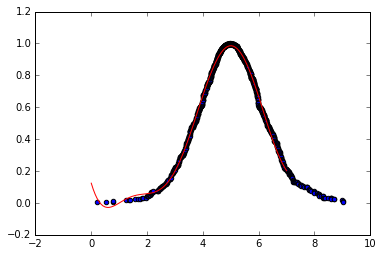

In [10]:
dossageEffectiveness = np.sort(dossageEffectiveness)
repurchaseRate = (dossageEffectiveness + np.random.normal(0, 1, 1000)) * 3
repurchaseRate/=np.max(repurchaseRate)


angles = np.sort(np.random.uniform(0,np.pi,1000))
cs = np.sin(angles)


repurchaseRateComplicated = repurchaseRate+(cs*100)
repurchaseRateComplicated/=np.max(repurchaseRateComplicated)

poly = np.poly1d(np.polyfit(dossageEffectiveness, repurchaseRateComplicated, 9))

xPoly = np.linspace(0, 7, 100)
plt.scatter(dossageEffectiveness, repurchaseRateComplicated)
plt.plot(xPoly, poly(xPoly), c='r')
plt.show()


With a high-N polynomial, it is unlikely to hold up to future testing and only fits the test data well.

# Multivariate Regression

Just regression above with more than one variable being fit.

### Key points

* Avoid using features that don't provide additional information
* combine features together when it makes sense to reduce dimensionality
* Need to assume features are not dependent on each other, even though not always or even usually true

### Example of using Multivariate Regression to estimate car prices based on their features is covered in MultivariateRegression.ipynb

# Multi-Level Models

* Effects happen at different levels
    * a lower level feature depends on its environment, and the level above that...

**Multi-Level Models attempt to model these interdepndencies**

Commonly applied in healthcare.

Not covered in more detailed beyond general discusion in lecture 22, and instead recommends a [book](https://books.google.co.jp/books?id=TKZZLlBEwW4C&dq=modeling+multi-level+systems+octavian&source=gbs_navlinks_s) for further reading. 

# Bayesian Methods: Concepts

## Bayes' Theorem (not covering it here as it is in my PhD and MSc theses)
One good real-world application is in a *spam filter*.  **Naive Bayes'** can be used to develop a model that can discriminate normal (Ham) emails from garbage (Spam).  Lots of ways to improve it, but works fairly well in a basic sense.

#### For more, check lecture 25-26

## Spam Classifier/Filter with Naive Bayes
Supervised learning.

### Steps

* Read in emails and their classification of ham/spam **the bulk of the code**
* Vectorize emails to numbers representing each word
* Get a functional object that will perform *Multinomial Naive Bayes'* from *sklearn*
* Fit vectorized emails
* Check it worked with test cases

### for more code and details, see NaiveBayes.ipynb

In [ ]:
## for more code and details, see NaiveBayes.ipynb

import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

## *** Read in the emails and their classification ***
def readFiles(path):
    # NO CODE HERE, JUST READ IN FILES FROM A DIR 
    # AND RETURN: FULL PATH AND MESSAGES BODY
    
def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})
data = data.append(dataFrameFromDirectory('spamdir', 'spam')) #not real file/dir, just ex
data = data.append(dataFrameFromDirectory('hamdir','ham'))#not real file/dir, just ex
## *** Done reading in data ***

# vectorize email contents to numbers
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

# make multinomial Naive Bayes object/func
classifier = MultinomialNB()
targets = data['class'].values
# fit vectorized emails 
classifier.fit(counts, targets)

# Check it worked with obviouse test casese
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

# K-Means Clustering

## Unsupervised learning

* Attempts to split data into K groups that are closest to K centroids.

    * (1)Centroids are adjusted to the center of the points that were closest to it.

    * (2)Points are then used to find which centroids they are closest to again.

* repeat 1 & 2 until error or distance centroids move converges.

### Caveats

* choosing K
    * try increasing K until you stop getting large reductions in $\chi^2$
    
* use different randomly chosen initial centroids to avoid local minima

* Still need to determine labels for clusters found.

#### Example of its use can be found in KMeans.ipynb


# Entropy 

* A measure of a data set's disorder - how same or different it is.  
* Classify data set into N classes.
    * Entropy of 0, implies all data is the same class
    * High entropy, implies there are many types of classes in the data

### Computing Entropy

* $H(s) = -p_1ln(p_1) -...-p_nln(p_n)$
* $p_i$ represents portion of data with that class/label
* casses where all data is or all data is not a particular class contribute zero to entropy.  So, non-zero only when portions of the data are in different classes.

In [ ]:
!pip install --upgrade graphviz

# Decision Trees

### Supervised learning

* flowcharts to assist with classification choices
* EX. A tree of resume contents organized by its relation to the chances of being hired.

## Random Forests

#### Can use 'from sklearn import tree',  AND pandas to organize data going into the trees.  Graphviz can be used to visualize resulting trees.

* Decision trees are very susceptible to overfitting
    * construct many trees in a 'forest' and have them all 'vote' towards the outcome classification
         * MUST randomly sample data used to make each tree!
         * Also, randomize the attributes each tree is fitting.
         
##### steps

* read in data with pandas
* convert columns used to make decisions into ordinal numbers with a map function

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

* push these into a 'features' list
* get array of matching decisions from supervised portion for training
* make decision tree

In [ ]:
features = list(df.columns[:6])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features,decisions)

* use graphviz to display resulting tree

##### upgrade to using a random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(features,decisions)

#Predict employment of an employed 10-year veteran
print clf.predict([[10, 1, 4, 0, 0, 0]])
#...and an unemployed 10-year veteran
print clf.predict([[10, 0, 4, 0, 0, 0]])

# Ensemble Learning

Multiple models work together to make a prediction
* Ex. random forests.

#### methods

* Bagging (bootsrap aggregating): many models built by training on randomly-drawn subsets of data
* Boosting: additional models added to help address data mis-classified by previous model
* 'bucket of models': Train multiple models, then pick one that works best on test data
* Stacking: run multiple models on same data, then combine output results

## Advanced Ensemble Learning

* Bayes Optimal Classifier (BOC)
    * Theoretically the best - but almost always impractical
* Bayesian Parameter Averaging
    * Attempts ot make BOC practical.  Still susceptible to overfitting, often outperformed by simple bagging
* Bayesian Model Combination
    * Tries to fix all of these
    * BUT, ends up about the same as finding best combination of models with cross-validation

# Support Vector Machines (SVM)

* Works well for high-dimensional data (lots of features)
* Solves for high-dimensional support vectors to help divide up the data
* Applies a 'kernal trick' to represent data in higher dimensions in order to find the hyperplanes not initially apparent in the lower diimensions.
    * This is computationally expensive, and why it is not as useful for low-D data.

Ex. Identify types of iris flower by length and width of sepal.

###### General:
With a simple linear kernal.

In [ ]:
from sklearn import svm, datasets
C = 1.0 #error penalty.  1 is default.
svc = svm.SVC(kernel='linear', C=C).fit(features, classifications)

#Check for another set of features
svc.predict([[200000, 40]])  #output will be classification for those features

# Recommender Systems

## User-Based Collaborative Filtering

* Build matrix of things each user bought/viewed/rated
* Compute similarity scores between users
* Find similar users
* Recommend stuff similar users boughts... that current user hasn't seen yet.

#### Caveats

* People's likes change
* Number of people commonly >> number of items.  Thus, needs lots of filtering.
* People intentially fabricate fake users to boost/trash to their advantage 
    * Shilling attack

## Item-based Collaborative Filtering

Resolves some of the problems that arise from using people's actions to make recommendations mentioned above.
* less items than people, faster to compute.
* harder for people/users to intervene 

#### Idea

* Find all pairs of items bought/viewed/rated by same user
* Measure similarity of the item's ratings/bought... for all users that bought/viewed both
* sort by item
* sort by similarity
* Use a look-up table of results to make recommendtions to users

#### Steps

* import data with pandas
* convert data to database with items, users and rating/frequency bought...

In [ ]:
import pandas as pd
## see 'SimilarMovies.ipynb' for basics of finding similar movies
## see 'ItemBasedCF.ipynb' for improved filtering and results

ratings = pd.read_csv('ratingsData') # not a real file, just ex
movies = movies = pd.read_csv('items')# not a real file, just ex
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')

* Calculate correlation between rating/frequency bought with pandas
* Clean out spurrious results.  THIS IS TRICKY, BUT THE MOST IMPORTANT PART TO MAKE SURE RECOMMENDATIONS ARE SUCCESSFUL TO PRODUCING SALES.  Will probably go through many rounds of cleaning input data, tweaking correlation function, and cleaning resulting correlations.

In [ ]:
# Calculate item correlations
corrMatrix = userRatings.corr()
# ex of simple cleaning
corrMatrix = userRatings.corr(method='pearson', min_periods=100)

* Use cleaned correlations array(s) to make recommendations
* Try grouping results to help find top matches

In [ ]:
# group results and return top matches
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)
# filter out those current user has seen or bought
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

## further filtering ideas for this example at bottom of ItemBasedCF.ipynb

# K-Nearest Neighbours (KNN)

Supervised learning

* Similar to K Means Clustering
* Classify new data points based on their distance from known data
* Find the K nearest neighbord, based on this 'distance'
* Allow all KNN to vote on classification

#### example in KNN.ipynb

### Steps

* import data with pandas
* Group data by features of interest
* Convert those for making classifications from into a normalized form
* Make a distance calculating function
* Find KNN
* Sort or something to give results back


In [ ]:
import pandas as pd
### for more real code, see KNN.ipynb 

# bring in the data
ratings = pd.read_csv("data")# not a real file, just ex
# group by features of interst
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
# normalize features of interest for classification
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [ ]:
from scipy import spatial

def ComputeDistance(a, b):
    """ Function to comput distance between two items."""
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [ ]:
import operator

def getNeighbors(movieID, K):
    """ Get KNN and return sorted neighbors."""
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

## again, see KNN.ipynb to see how the results can be 
## displayed to see how it went

# Principle Component Analysis (PCA)

When data has too many dimensions, extract sets of basis data that can be combined to re-produce the high-D data sufficiently.  In another way: find a way to represent the data with minimal dimensions that sufficiently preserves its variance.

### very useful in image compression and face recognition

* Commonly implementation is Single Value Decomposition (SVD)

Ex. Identify types of iris flower by length and width of sepal.  Data comes with scikit-learn.
* With PCA 4 length & width of petals & sepal (4D) -> 2D

#### See PCA.ipynb for all code

### steps

* Import data
* Apply PCA
* Check how much variance was captured

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

# load data
iris = load_iris()
#numSamples, numFeatures = iris.data.shape

# apply PCA
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
print pca.components_
#check remaining variance
print pca.explained_variance_ratio_
print sum(pca.explained_variance_ratio_)  #1.0 would implies 100% variance kept

## see rest of PCA.ipynb to see how to plot resuls

# Data Warehousing

## ETL: Extract, Transform, Load

The more 'traditional' approach.
* raw data from operational systems periodically *extracted*
* raw data is *transformed* into a required schema
* transformed data is *loaded* into warehouse

* BUT, step 2, *transform* can be a big problem with "big data"

## ELT: Extract, Load, Transform

Push intensive transformation step to the end where it can be better optimized.  This approach is now much more scalable than ETL.

* Extract raw data as before
* load it in to datawarehouse raw
* let cluster (Hadoop) process and manage data in-place
* Query reduced data with new methods such as NoSQL, Spark or MapReduce


# Reinforcement Learning

One example is Pac-Man.
### Idea:
* agent 'explores' space
* allow agent to learn values of different state changes in different conditions
* state & choice values then used to make informed future decisions

## Q-Learning
Implementation of reinforcement learning.
* have:
    * set of environmental states **s**
    * set of possible actions **a** for each state
    * value of state/action **Q**

* Start all Q's at 0
* explore
* bad things -> reduce Q for that state/action
* good things -> increase Q

### The exploration problem
Use Bayes theorem to include intelligent randomness into exploration to increase the learning efficiency.  Thus, a **Markov Decision Process (MDP)**

Use This in tandem with Q-learning to build up a list of all possible states and the reward values (Q values) for every available action in that state.  Can be considered to implement *Dynamic Programming* or *Memoization* in some cases or terms.

## For more details, code and learning problems based on Pac-Man:
[Pac-Man: Reinforcement Learning](https://inst.eecs.berkeley.edu/~cs188/sp12/projects/reinforcement/reinforcement.html)

[Cat & Mouse Problem](https://github.com/studywolf/blog/tree/master/RL/Cat%20vs%20Mouse%20exploration)

[Markov Decision Process (MDP) toolbox for Python](http://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html)



## Dealing with Real-World Data

Lectures 48-53 based on issues of applying course fundamentals to real world data.

## Apache Spark: Machine Learning on Big Data

Using **MLLib** to esentially do things like K-Means Clustering, Decision Trees... reviewed in pure Python before, but in a way that could be ran locally OR on a **Hadoop** cluster with **Amazon Web Services (AWS)**.